In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems

A classification is where you try to classify something as one thing or another
A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification


## Creating data to view and fit

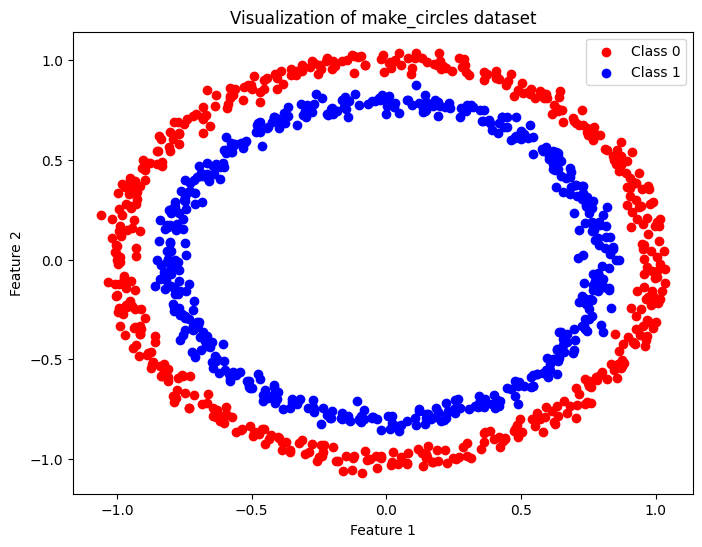

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

# Data visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of make_circles dataset')
plt.legend()
plt.show()

In [3]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

# Our data is a little hard to understand right now.. let's visualize it!

In [6]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


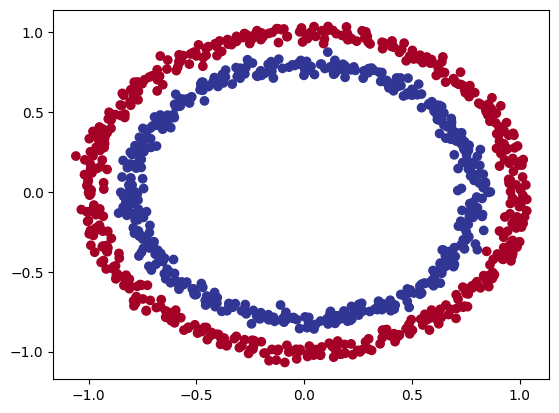

In [6]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [34]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [35]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [36]:
# Check tf version
tf.__version__

'2.12.0-rc1'

In [37]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequantial API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 5.1715 - accuracy: 0.4810
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 3.9342 - accuracy: 0.4770
Epoch 3/5
32/32 [==============================] - 0s 569us/step - loss: 1.4981 - accuracy: 0.4770
Epoch 4/5
32/32 [==============================] - 0s 671us/step - loss: 0.7280 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.4940


In [38]:
# Let's try and improve our model by training for longer ...
model_1.fit(X, y, epochs=200, verbose=0)

In [39]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 991us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getiing around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [41]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequantial API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [42]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization functions such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs

In [43]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 10 dense neurons
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [44]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               300       
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.5110


[0.6988096237182617, 0.5109999775886536]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [5]:
def plot_decision_boundary(model, X, y):
    """
    Plots the dicision boundary created by a model predicting on X.
    This function was inspired by two resources: 
    1. cs231n
    2. madewithml
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 788us/step
doing binary classification


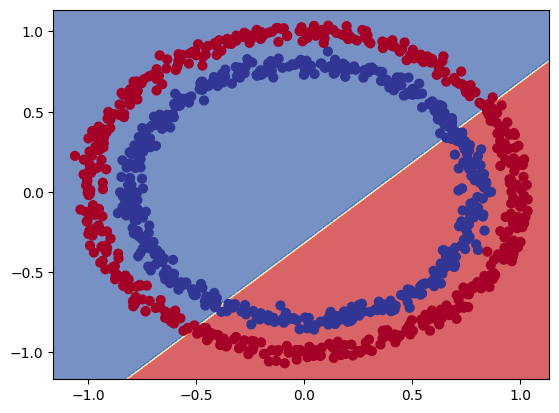

In [47]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [13]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regresion data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

X_reg_train = tf.expand_dims(X_reg_train, axis=-1)

# Fit our model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
#             y_reg_train,
#             epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [14]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 519.6327 - mae: 519.6327
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 394.0605 - mae: 394.0605
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 275.0235 - mae: 275.0235
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 153.2111 - mae: 153.2111
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 53.3748 - mae: 53.3748
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 87.0863 - mae: 87.0863
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 85.0331 - mae: 85.0331
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 51.8624 - mae: 51.8624
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 49.6359 - mae: 49.6359
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 48.6045 - mae: 48.6045
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 2ms/step


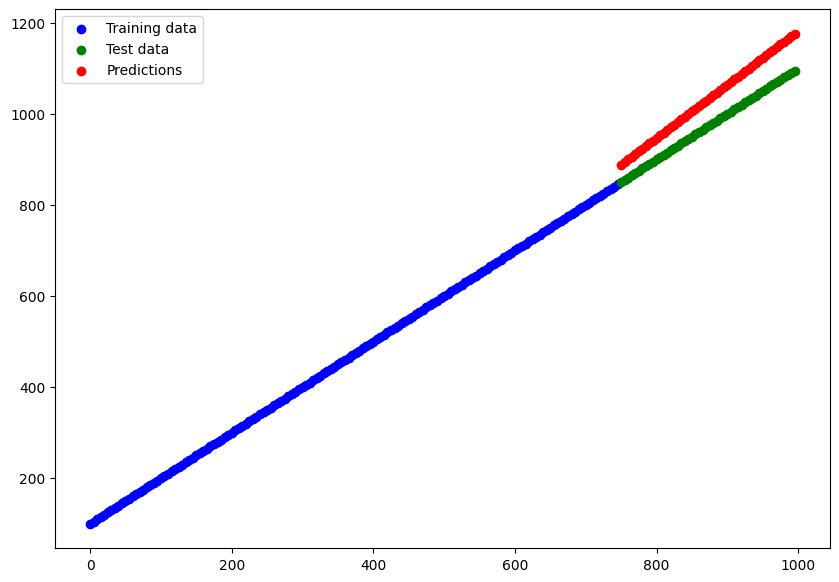

In [15]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_pred, c='r', label="Predictions")
plt.legend()

# The missing piece: Non-linearity

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3727 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3090 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 956us/step - loss: 4.2874 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 941us/step - loss: 4.2485 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 930us/step - loss: 4.2300 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 924us/step - loss: 4.1832 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1668 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1645 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1629 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1613 - accuracy: 0.4740
E

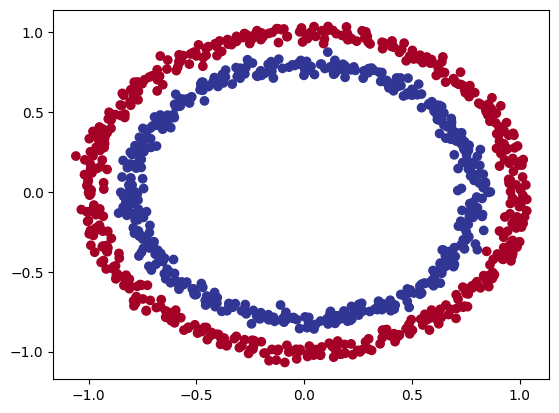

In [12]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 781us/step
doing binary classification


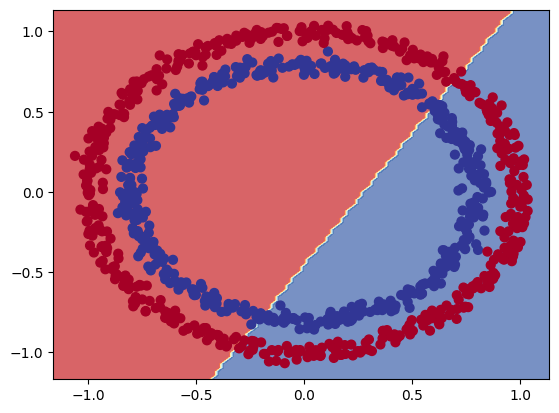

In [13]:
# Check the dicision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

## Let's try build out first neural network with a non-linear activation function

In [6]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3574 - accuracy: 0.4690
Epoch 2/100
32/32 [==============================] - 0s 978us/step - loss: 4.3308 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 947us/step - loss: 4.3134 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 566us/step - loss: 4.3107 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 687us/step - loss: 4.3086 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 979us/step - loss: 4.3061 - accuracy: 0.4700
Epoch 7/100
32/32 [==============================] - 0s 977us/step - loss: 4.3037 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3014 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 994us/step - loss: 4.2899 - accuracy: 0.4690
Epoch 10/100
32/32 [==============================] - 0s 1000us/step - loss: 4.2745 - accuracy:

313/313 [==============================] - 0s 661us/step
doing binary classification


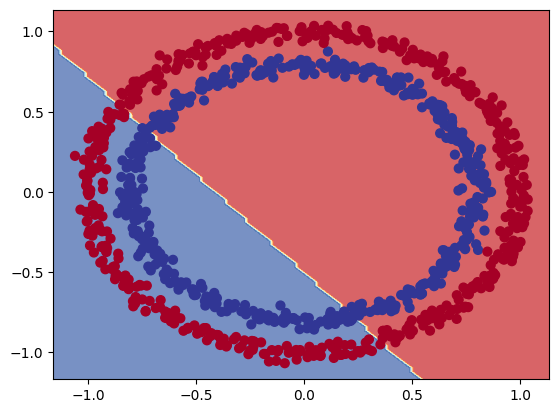

In [7]:
# Check the dicision boundary for our latest model
plot_decision_boundary(model=model_5, X=X, y=y)

In [13]:
# Time to replicate the multi-layer neural network from TensorFlow playground to code ...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/250


32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 246/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 247/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 248/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 249/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 250/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


In [12]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.3730


[0.5291059613227844, 0.37299999594688416]

313/313 [==============================] - 0s 698us/step
doing binary classification


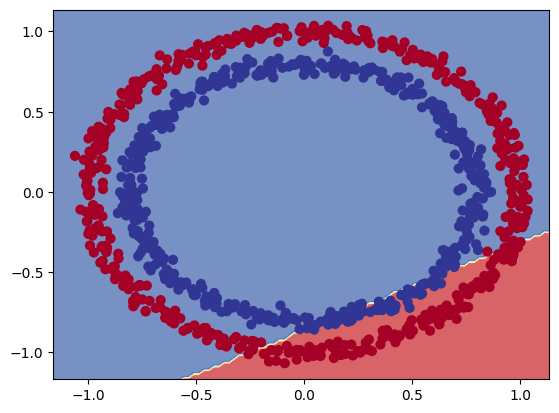

In [14]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=350)

Epoch 1/350
32/32 [==============================] - 1s 1ms/step - loss: 0.7202 - accuracy: 0.5000
Epoch 2/350
32/32 [==============================] - 0s 1ms/step - loss: 0.7107 - accuracy: 0.4860
Epoch 3/350
32/32 [==============================] - 0s 1ms/step - loss: 0.7053 - accuracy: 0.4590
Epoch 4/350
32/32 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.4580
Epoch 5/350
32/32 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.4260
Epoch 6/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.4010
Epoch 7/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.4260
Epoch 8/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4370
Epoch 9/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.4270
Epoch 10/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4140
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.6540
Epoch 84/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.6710
Epoch 85/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.6820
Epoch 86/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.6920
Epoch 87/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.6850
Epoch 88/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.6830
Epoch 89/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.7010
Epoch 90/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.6660
Epoch 91/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.7140
Epoch 92/350
32/32 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.7170
Epoch 93/350


32/32 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.9750
Epoch 246/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1739 - accuracy: 0.9760
Epoch 247/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 0.9790
Epoch 248/350
32/32 [==============================] - 0s 991us/step - loss: 0.1680 - accuracy: 0.9770
Epoch 249/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1660 - accuracy: 0.9830
Epoch 250/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1633 - accuracy: 0.9830
Epoch 251/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1619 - accuracy: 0.9810
Epoch 252/350
32/32 [==============================] - 0s 1ms/step - loss: 0.1604 - accuracy: 0.9830
Epoch 253/350
32/32 [==============================] - 0s 976us/step - loss: 0.1583 - accuracy: 0.9850
Epoch 254/350
32/32 [==============================] - 0s 986us/step - loss: 0.1561 - accuracy: 0.983

32/32 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9860
Epoch 327/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9820
Epoch 328/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9820
Epoch 329/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9850
Epoch 330/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9840
Epoch 331/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9810
Epoch 332/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9840
Epoch 333/350
32/32 [==============================] - 0s 991us/step - loss: 0.0904 - accuracy: 0.9840
Epoch 334/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0902 - accuracy: 0.9850
Epoch 335/350
32/32 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9840
Ep

In [19]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9820


[0.08308777958154678, 0.9819999933242798]

313/313 [==============================] - 0s 734us/step
doing binary classification


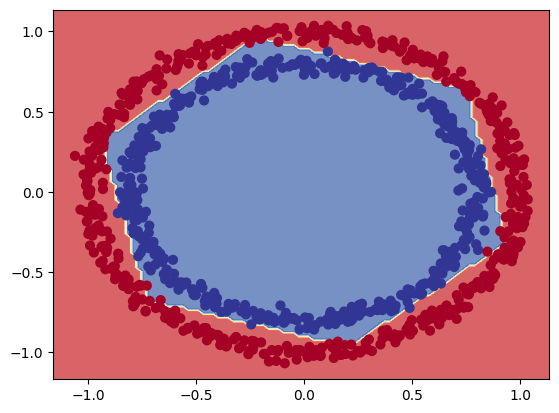

In [20]:
# How do our model predictions look?
plot_decision_boundary(model_7, X, y)

# Now we've discussed the concept of linear and non-linear functions, now let's see them in action.

In [9]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

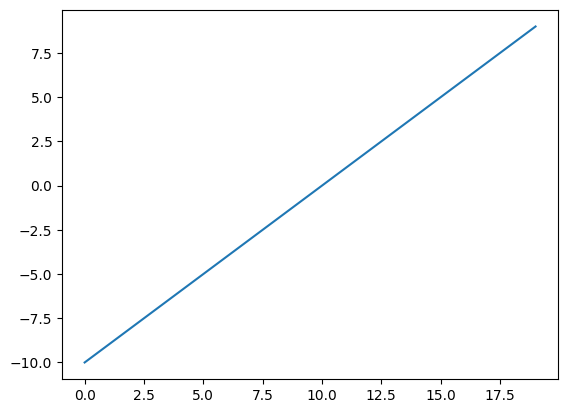

In [11]:
# Visualize our toy tensor
plt.plot(A);

In [13]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + epx(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use our sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

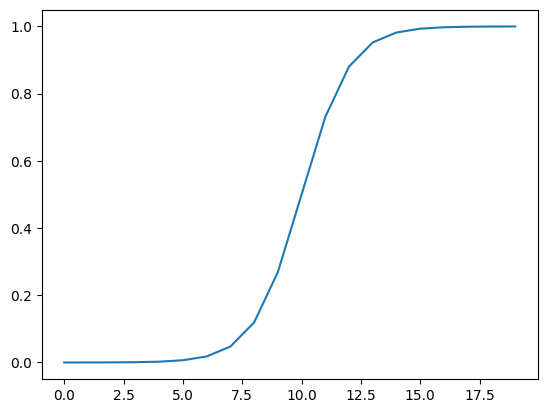

In [15]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [16]:
# Let's recreate a relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

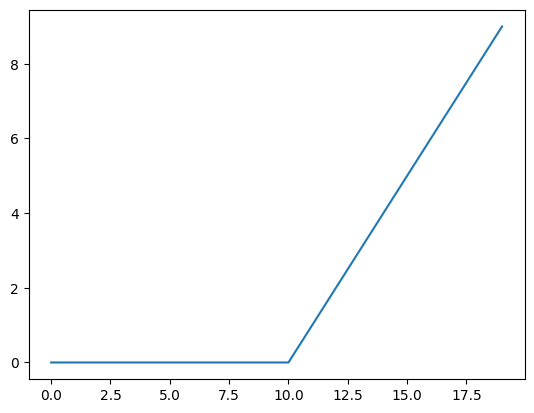

In [19]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [20]:
# Let's try the linear activation fucntion
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

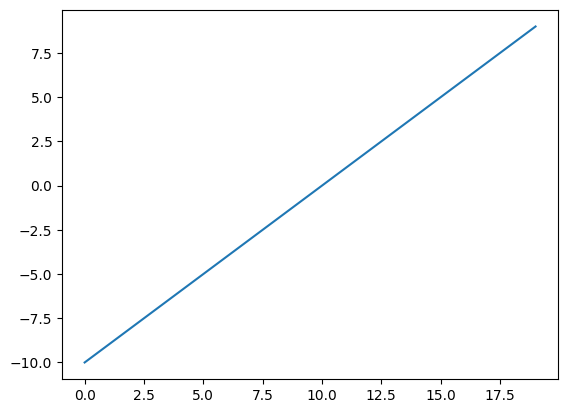

In [21]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [22]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.


In [16]:
# Check how many examples we have
len(X)

1000

In [17]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [13]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 0s 1ms/step - loss: 0.7266 - accuracy: 0.4863
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.7114 - accuracy: 0.4750
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.4750
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.4737
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4837
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.4512
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.4675
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.4900
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5150
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5300
Epoch 11/50
25/25 [

In [39]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 1.0000


[0.07425741106271744, 1.0]

313/313 [==============================] - 0s 809us/step
doing binary classification
313/313 [==============================] - 0s 792us/step
doing binary classification


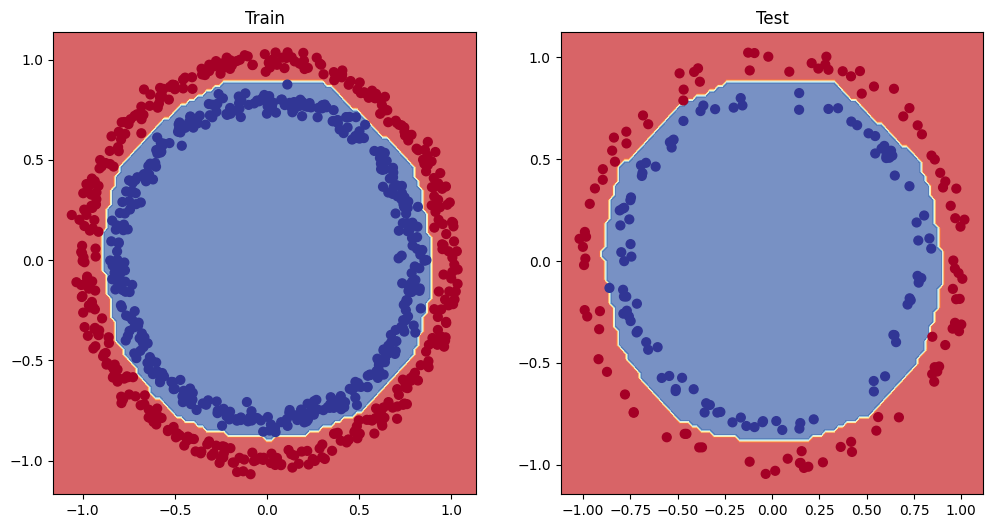

In [40]:
# Plot the decision boundary for the train and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [42]:
# Convert the history object into a DataFrame

pd.DataFrame(history.history)

,loss,accuracy
0,0.691072,0.50250
1,0.689278,0.50875
2,0.688140,0.51125
3,0.687351,0.52125
4,0.686634,0.52375
...,...,...
95,0.086153,1.00000
96,0.083910,1.00000
97,0.081111,1.00000
98,0.078472,1.00000


Text(0.5, 1.0, 'Model_8 loss curves')

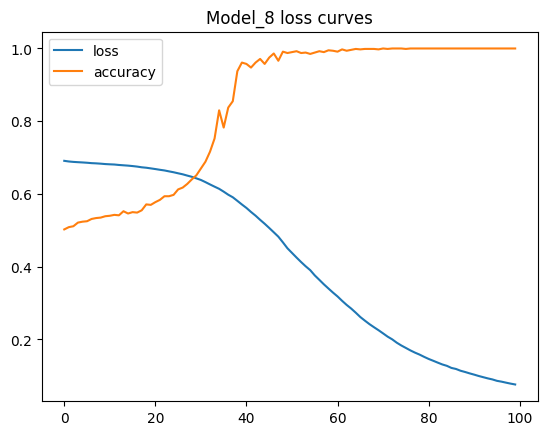

In [43]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems, the loss function going down means the model is improving (the prediction going down means the model is improving (the predictions it's making are getting closer to the ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreeses the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [48]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy',
               optimizer='Adam',
               metrics=['accuracy'])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 716us/step - loss: 0.6923 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - los

<Axes: xlabel='epochs'>

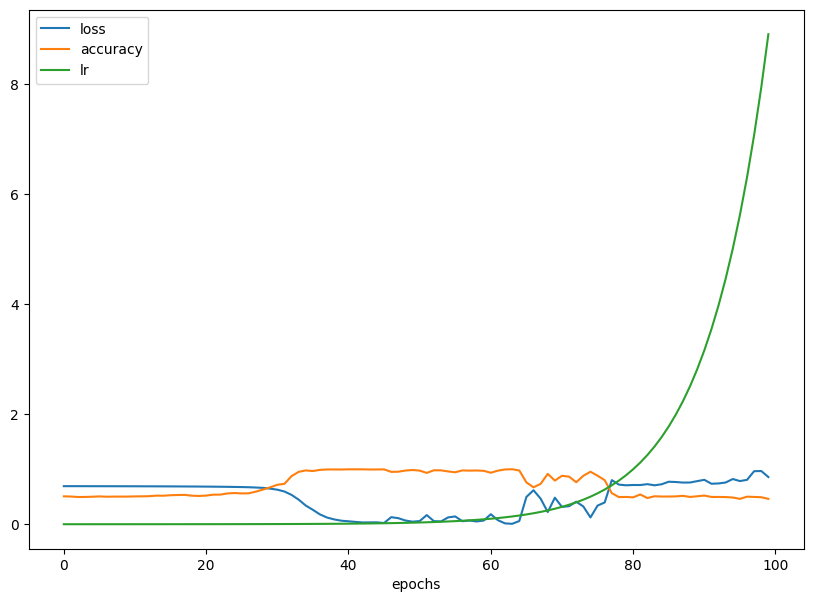

In [49]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs Loss')

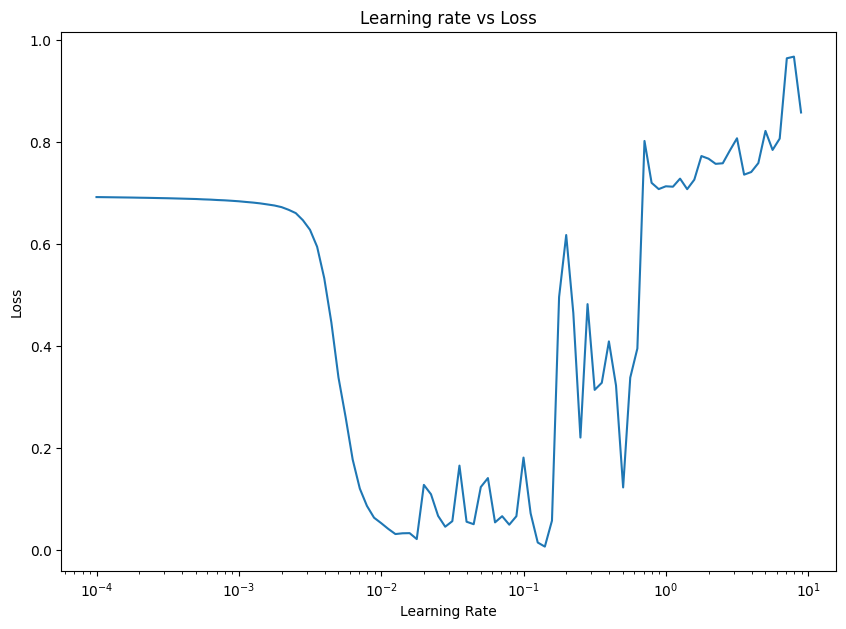

In [53]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title('Learning rate vs Loss')

In [54]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [18]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the ideal learning rate
model_10.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.4950
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.4988
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.4988
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.4988
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5000
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5013
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5150
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5725
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.6175
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.6050
Epoch 11/50
25/25 [

In [59]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.9950


[0.3361480236053467, 0.9950000047683716]

In [60]:
model_8.evaluate(X_test, y_test)

NameError: name 'model_8' is not defined

313/313 [==============================] - 0s 821us/step
doing binary classification
313/313 [==============================] - 0s 757us/step
doing binary classification


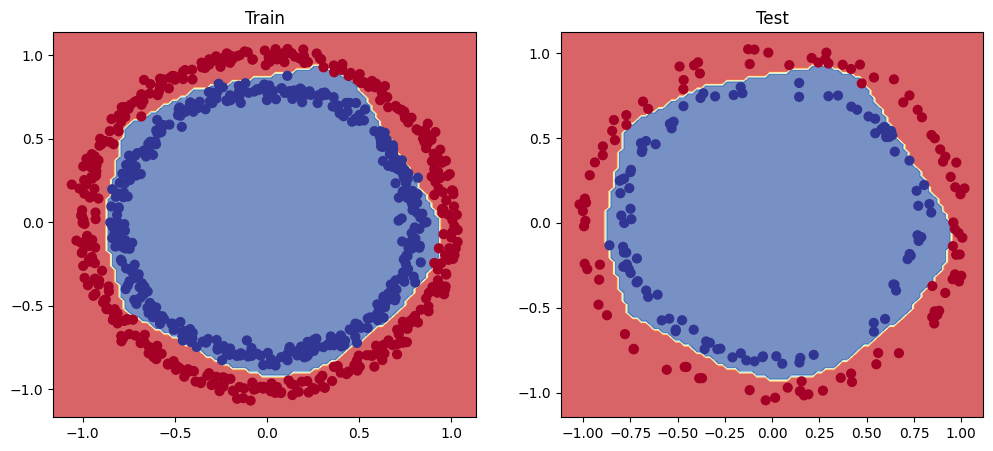

In [61]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualising our models results as much as pissible, there are a handful of other classification methods & metrics you should be familiar with:
* Accuracy
* Precission
* Recall
* F1-score
* Confucion matrix
* Classification report from sk-lear

In [69]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy * 100):0.2f}')

7/7 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.9950
Model loss on the test set: 0.3361480236053467
Model accuracy on the test set: 99.50


### How about a confucion matrix?

In [70]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confucion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [71]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [72]:
y_preds[:10]

array([[0.5902311 ],
       [0.79022527],
       [0.75367254],
       [0.8190243 ],
       [0.52873427],
       [0.2179329 ],
       [0.74704784],
       [0.20225002],
       [0.6551703 ],
       [0.17928165]], dtype=float32)

Ooops... looks like our predictions array has come out in **prediction probability** from the sigmoid (or softmax) activation functions.

In [73]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [74]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]], dtype=int64)

How about we prettify our confusion matrix?

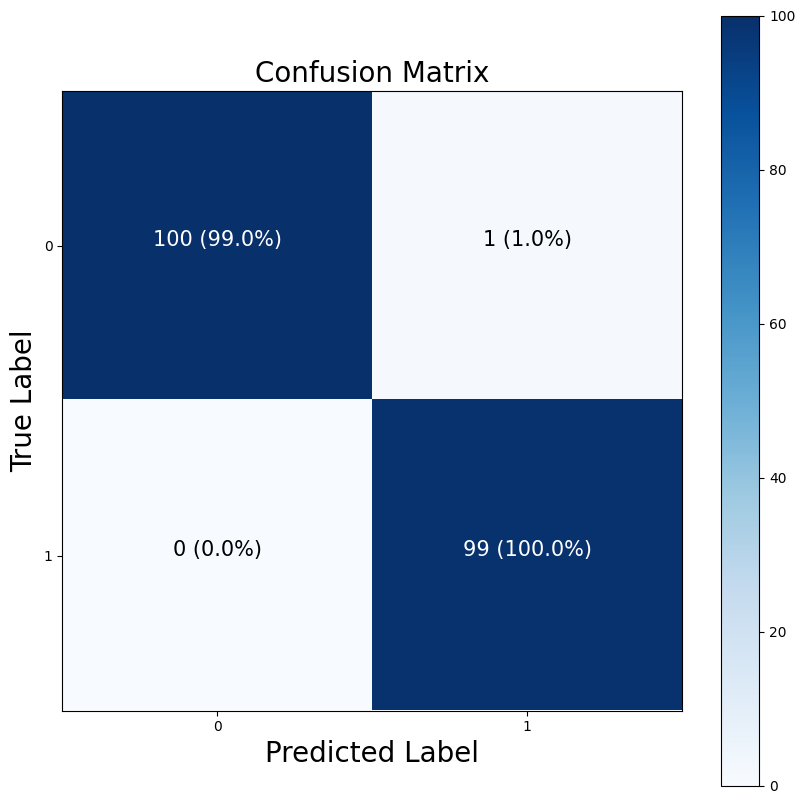

In [68]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix function

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normilize our confusion matrix
n_classes = cm.shape[0]

# let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [75]:
cm_norm

array([[0.99009901, 0.00990099],
       [0.        , 1.        ]])

# Working with a larger example (multiclass classification)

When you have more then two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing. 

In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [28]:
# show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [29]:
# Check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

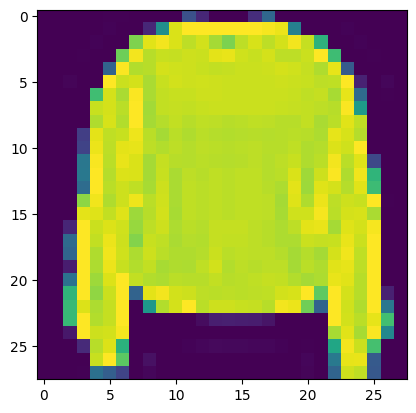

In [30]:
# Plot a single sample
plt.imshow(train_data[7]);

In [31]:
# Check out samples label
train_labels[7]

2

In [32]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

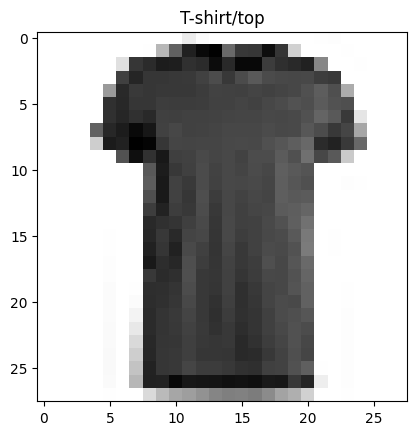

In [33]:
# Plot an example image and its label
index = 17
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

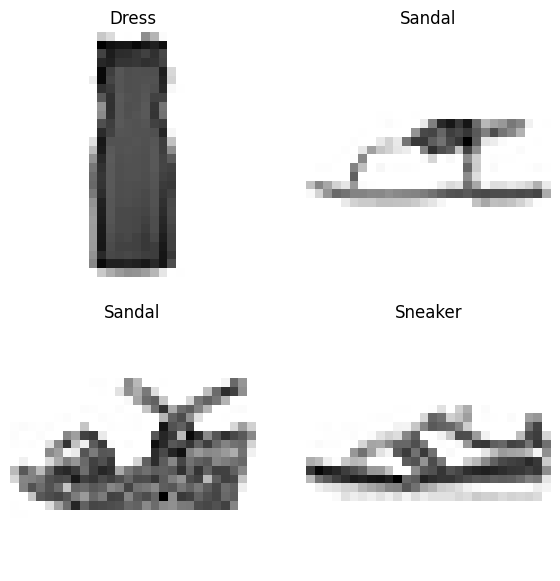

In [34]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

# Building a multiclass classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 X 28 (the shape of one image)
* Output shape = 10 (one per class of clossing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded, use CategoricalCrossentropy()
    * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [35]:
# Our data needs to be flattened (from 28*28 to none, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [36]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4145 - accuracy: 0.0986 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3032 - val_accuracy:

In [37]:
# Check the model summary
model_11.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 4)                 3140      
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [40]:
# We can get out our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [41]:
# Now our data is normilized, let's build a model to find patterns

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4049 - accuracy: 0.4932 - val_loss: 0.8183 - val_accuracy: 0.6803
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7230 - accuracy: 0.7386 - val_loss: 0.7125 - val_accuracy: 0.7397
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6332 - accuracy: 0.7791 - val_loss: 0.6306 - val_accuracy: 0.7778
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5898 - accuracy: 0.7949 - val_loss: 0.6074 - val_accuracy: 0.7867
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5701 - accuracy: 0.8014 - val_loss: 0.5980 - val_accuracy: 0.7900
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5576 - accuracy: 0.8047 - val_loss: 0.5841 - val_accuracy: 0.7937
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5493 - accuracy: 0.8081 - val_loss: 0.5778 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normilized (numbers between 0 & 1).

<Axes: title={'center': 'Normilized data'}>

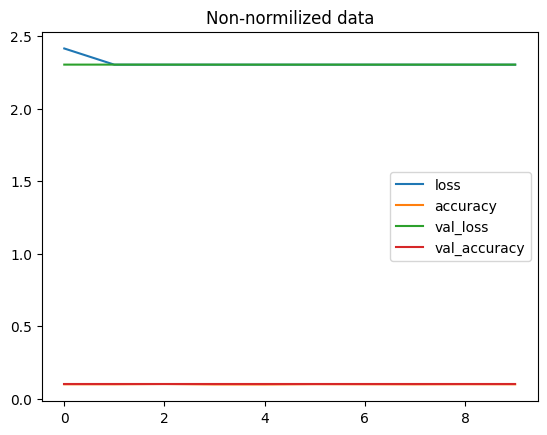

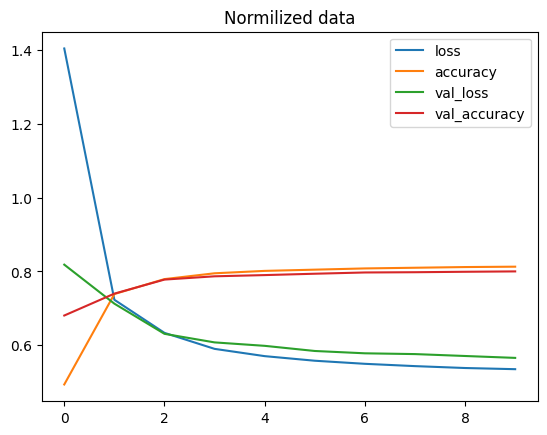

In [43]:
# Plot non-normilized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normilized data')
# Plot normilized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normilized data')

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e/g/ same architecture but different data or same data but different architecture).